# Chapter 3: Data Visualization


## Import required packages

In [1]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


## Bar and Scatter plots


Load Boston Housing data and display the average median value intersecting Charles River (CHAS)

In [2]:
housing = pd.read_csv('BostonHousing.csv')
print(housing.shape)

(506, 14)


In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [5]:
housing = housing.rename(columns = {'CAT. MEDV' : 'CAT_MEDV'})

In [6]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV'],
      dtype='object')

In [7]:
dataforplot = housing.groupby('CHAS').mean().MEDV
dataforplot

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

Pandas:

<Axes: xlabel='CHAS'>

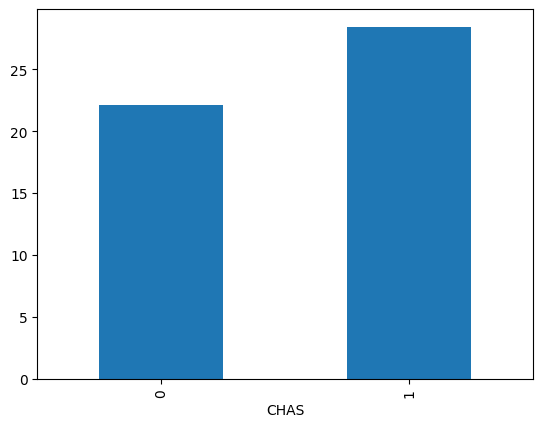

In [8]:
dataforplot.plot(kind='bar')

Matplotlib:

<BarContainer object of 2 artists>

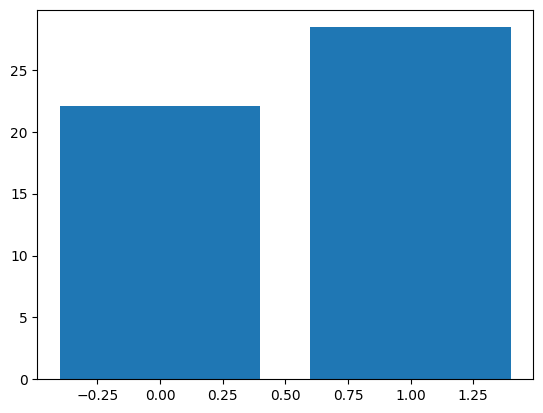

In [9]:
fig, ax = plt.subplots()

ax.bar(dataforplot.index, dataforplot)

Text(0, 0.5, 'Median Home Value')

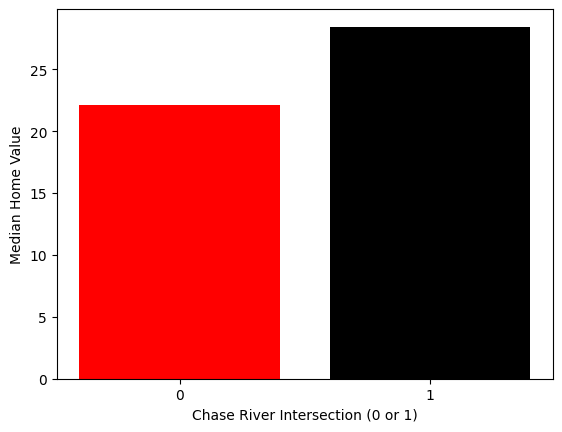

In [10]:
fig, ax = plt.subplots()

ax.bar(dataforplot.index, dataforplot, color=['red','black'])
ax.set_xticks([0,1])
ax.set_xlabel('Chase River Intersection (0 or 1)')
ax.set_ylabel('Median Home Value')


Display reationship between Median value and LStat

Pandas:

<Axes: xlabel='LSTAT', ylabel='MEDV'>

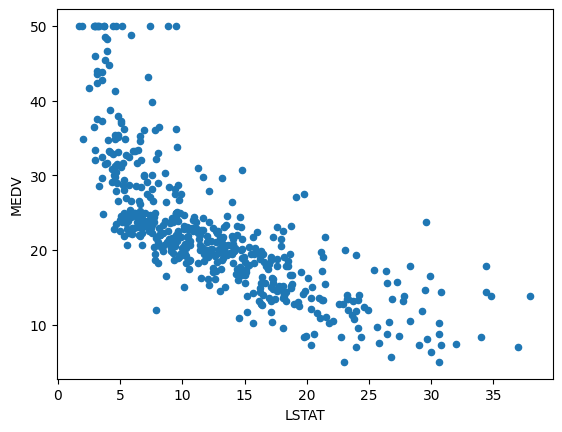

In [11]:
housing.plot.scatter('LSTAT','MEDV')

Matplotlib:

Text(0, 0.5, 'Median Home Value')

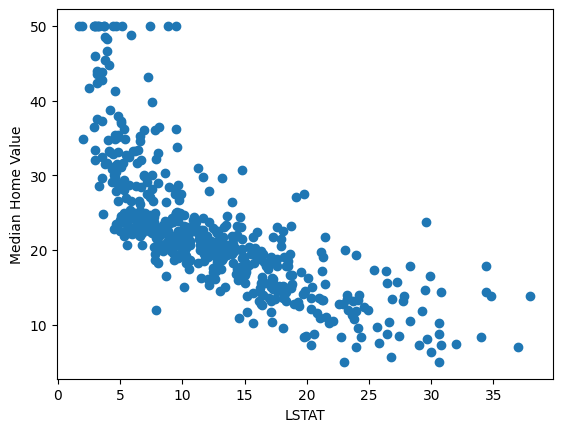

In [12]:
fig, ax = plt.subplots()
ax.scatter(housing.LSTAT, housing.MEDV)
plt.xlabel('LSTAT')
plt.ylabel('Median Home Value')

## Distribution Plots (Boston Housing)
Histogram of MEDV

Pandas:

Text(0, 0.5, 'Number of Census Tracts')

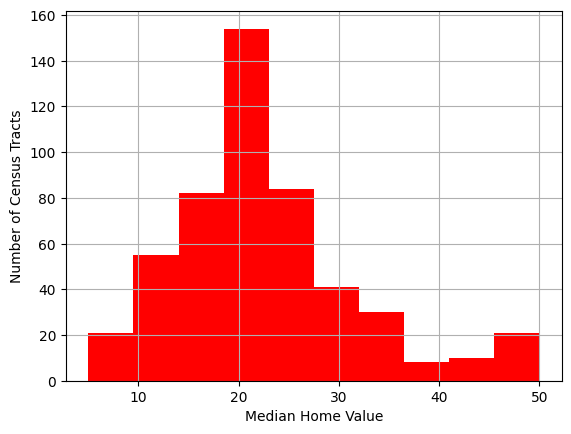

In [13]:
ax = housing.MEDV.hist(color=['red'])
ax.set_xlabel('Median Home Value')
ax.set_ylabel('Number of Census Tracts')
#ax.grid(None)

Matplotlib:

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

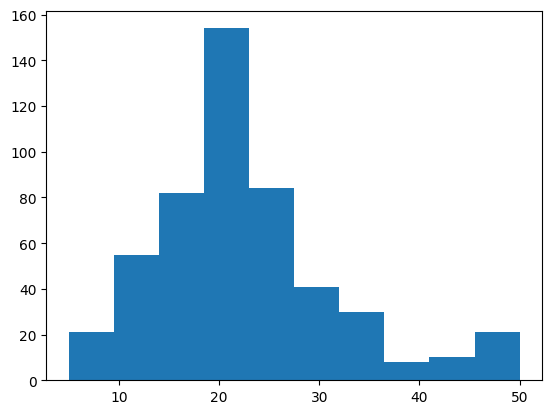

In [14]:
fig, ax = plt.subplots()
ax.hist(housing.MEDV)
#ax.grid(linestyle = '-.', color='blue')

Pandas:

<Axes: >

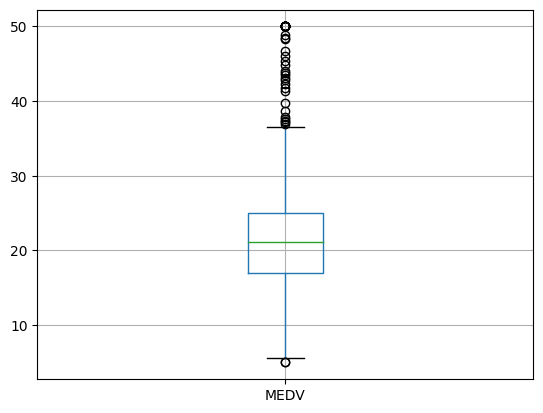

In [15]:
housing.boxplot(column='MEDV')

<Axes: title={'center': 'MEDV'}, xlabel='CHAS'>

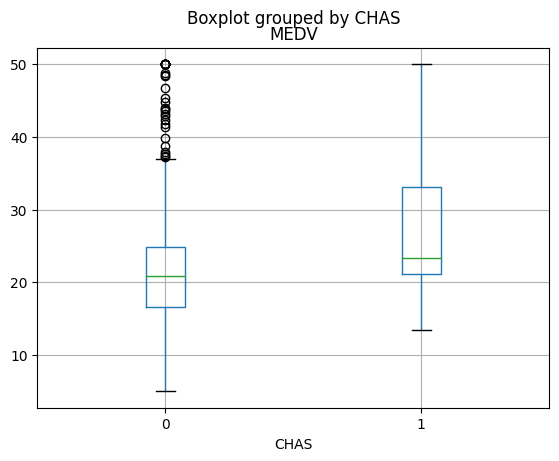

In [16]:
housing.boxplot(column='MEDV', by='CHAS')
#plt.suptitle('')
#plt.title('Median Home Values')
#subtitle down below; empty quotes will do

Text(0.5, 0.98, '')

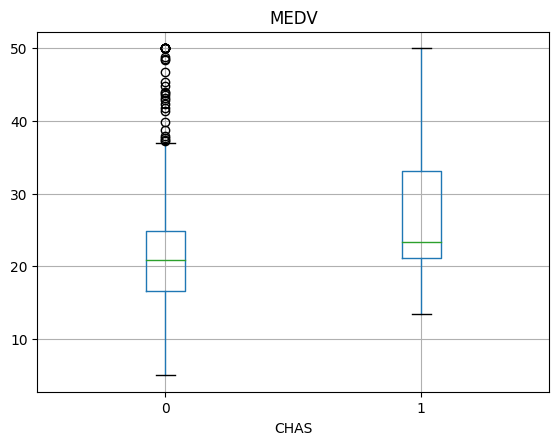

In [17]:
housing.boxplot(column='MEDV', by='CHAS')
plt.suptitle('')
#get rid of the title

Matplotlib:

In [18]:
#more code, we need set up the data; second list is where all the home values are 1
box_data = [list(housing[housing.CHAS == 0].MEDV),
            list(housing[housing.CHAS == 1].MEDV)]
box_data

[[24.0,
  21.6,
  34.7,
  33.4,
  36.2,
  28.7,
  22.9,
  27.1,
  16.5,
  18.9,
  15.0,
  18.9,
  21.7,
  20.4,
  18.2,
  19.9,
  23.1,
  17.5,
  20.2,
  18.2,
  13.6,
  19.6,
  15.2,
  14.5,
  15.6,
  13.9,
  16.6,
  14.8,
  18.4,
  21.0,
  12.7,
  14.5,
  13.2,
  13.1,
  13.5,
  18.9,
  20.0,
  21.0,
  24.7,
  30.8,
  34.9,
  26.6,
  25.3,
  24.7,
  21.2,
  19.3,
  20.0,
  16.6,
  14.4,
  19.4,
  19.7,
  20.5,
  25.0,
  23.4,
  18.9,
  35.4,
  24.7,
  31.6,
  23.3,
  19.6,
  18.7,
  16.0,
  22.2,
  25.0,
  33.0,
  23.5,
  19.4,
  22.0,
  17.4,
  20.9,
  24.2,
  21.7,
  22.8,
  23.4,
  24.1,
  21.4,
  20.0,
  20.8,
  21.2,
  20.3,
  28.0,
  23.9,
  24.8,
  22.9,
  23.9,
  26.6,
  22.5,
  22.2,
  23.6,
  28.7,
  22.6,
  22.0,
  22.9,
  25.0,
  20.6,
  28.4,
  21.4,
  38.7,
  43.8,
  33.2,
  27.5,
  26.5,
  18.6,
  19.3,
  20.1,
  19.5,
  19.5,
  20.4,
  19.8,
  19.4,
  21.7,
  22.8,
  18.8,
  18.7,
  18.5,
  18.3,
  21.2,
  19.2,
  20.4,
  19.3,
  22.0,
  20.3,
  20.5,
  17.3,
  18.8,


{'whiskers': [<matplotlib.lines.Line2D at 0x7cdd98ef7760>,
 'caps': [<matplotlib.lines.Line2D at 0x7cdd98ef7ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cdd98ef74c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7cdd98d20220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cdd98d204c0>,
 'means': []}

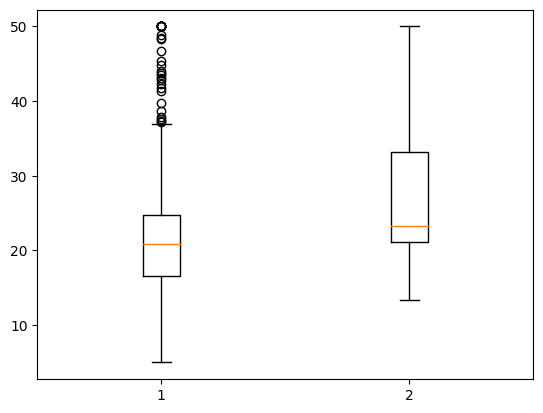

In [19]:
fig, ax = plt.subplots()
ax.boxplot(box_data)
#ax.set_xticklabels(['No','Yes'])
#ax.set_xlabel('On the Charles River')
#ax.set_ylabel('Median Value')

Text(0, 0.5, 'Median Value')

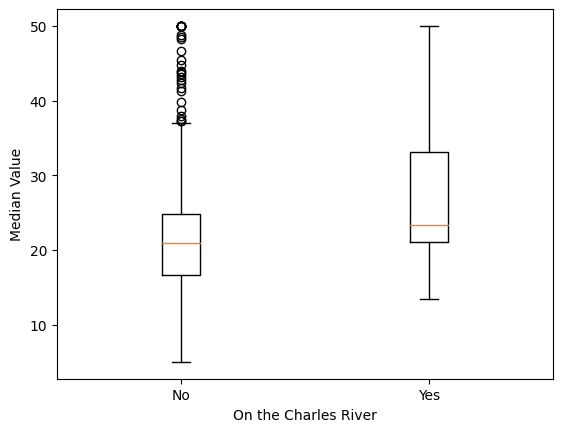

In [20]:
fig, ax = plt.subplots()
ax.boxplot(box_data)
ax.set_xticklabels(['No','Yes']) #refer to the box data above 0-No, 1-Yes
ax.set_xlabel('On the Charles River')
ax.set_ylabel('Median Value')
#the values 1 and 2 do not mean anything and can confuse us


## Line Plot (Amtrak Data)
Load the Amtrak data and convert them to be suitable for time series analysis

In [21]:
amtrak = pd.read_csv('Amtrak.csv')
amtrak.head()
#print(amtrak.head())
#amtrak.info()
#line charts - trends over time: time series, panel, longitudinal data

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [23]:
amtrak['date'] = pd.to_datetime(amtrak.Month, format='%d/%m/%Y')
print(amtrak.head())
amtrak.info()
#month is object - we need to change it; we need to give it some sort of time

        Month  Ridership       date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB


In [24]:
amtrak['date'] = pd.to_datetime(amtrak.Month, format='%d/%m/%Y')
#amtrak.head()
print(amtrak.head())
print(amtrak.info())
#month is object - we need to change it; we need to give it some sort of time

        Month  Ridership       date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB
None


In [25]:
amtrak['date'] = pd.to_datetime(amtrak.Month, format='%d/%m/%Y') #capital letter 4 digits; 2 digits- lower case; OR %d-%m-%Y
#amtrak.head()
print(amtrak.head())
amtrak.info()
#change obj (month) to date

        Month  Ridership       date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB


Pandas:

In [26]:
amtrak_ts=pd.Series(amtrak.Ridership.values, index=amtrak.date)
amtrak_ts.head()
#ridershipvalues in order(NOT IN ORDER) by date and store it in a series; ts is timeseries (just a short cut)
#can also use index 1-4 in order

date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
dtype: float64

In [27]:
amtrak['date']=pd.to_datetime(amtrak.Month, format='%d/%m/%Y')
print(amtrak.head())
amtrak.info()
#CHECK RECORDING OF PROF

        Month  Ridership       date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB


<Axes: xlabel='date'>

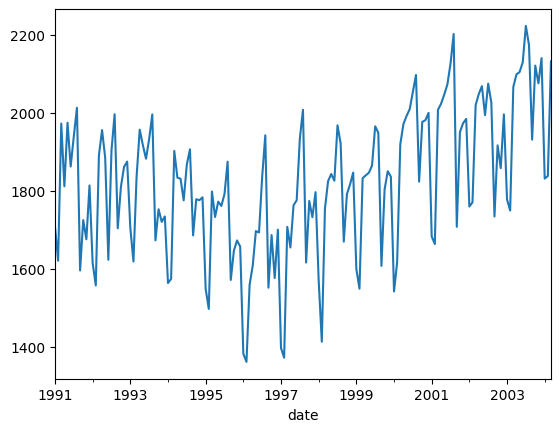

In [28]:
amtrak_ts.plot()
#amtrak_ts.plot(figsize=[10,5])

<Axes: xlabel='date'>

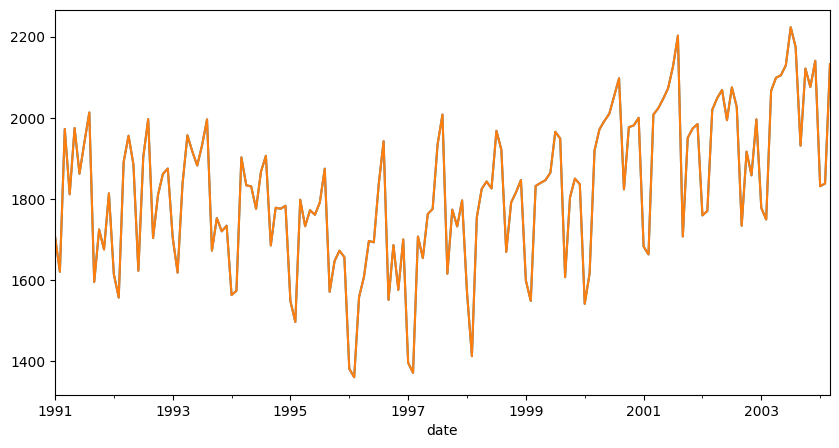

In [29]:
amtrak_ts.plot()
amtrak_ts.plot(figsize=[10,5])
#option to lengthen the plot

Matplotlib:

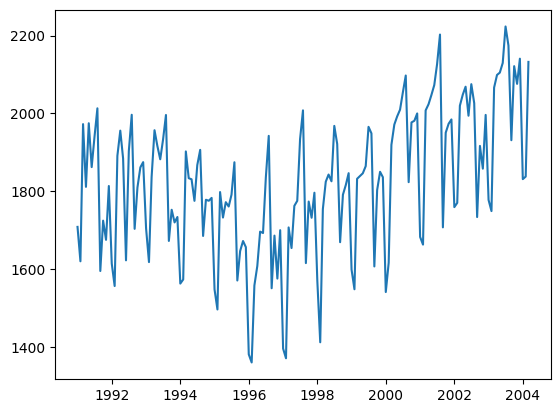

In [30]:
fig, ax = plt.subplots()
plt.plot(amtrak.date, amtrak.Ridership)

Pandas (not in book):

<Axes: xlabel='date'>

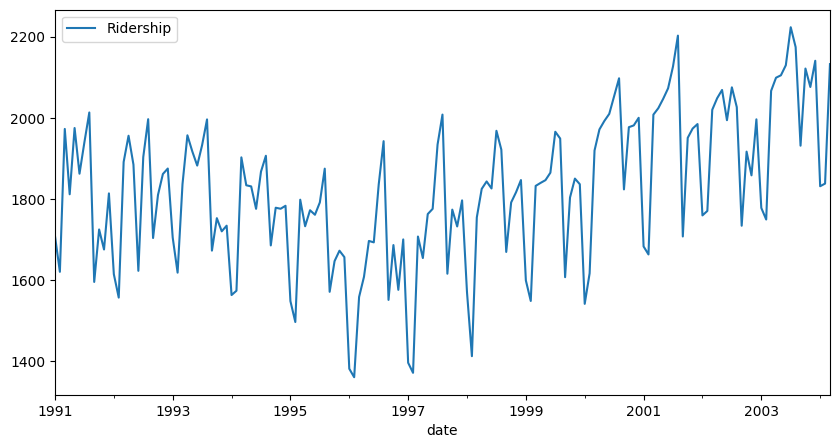

In [31]:
amtrak.plot('date','Ridership',kind='line', figsize=[10,5])

<Axes: xlabel='date'>

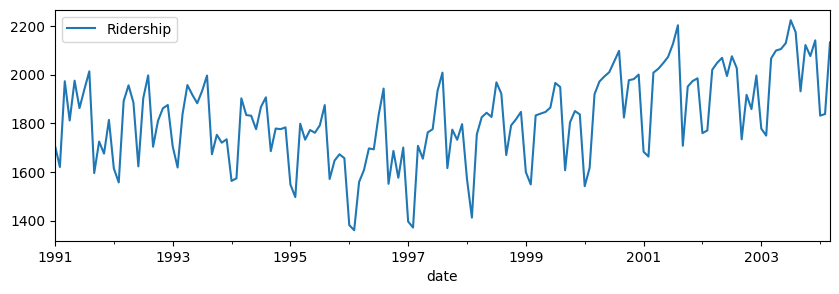

In [33]:
#Pandas not in book
amtrak.plot('date','Ridership',kind='line', figsize=[10,3])
#make it smaller 3
#CHECK RECORDING FOR THE DATE

<Axes: xlabel='Month'>

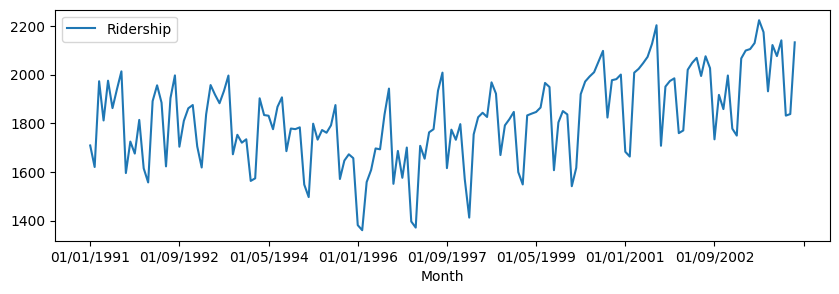

In [34]:
amtrak.plot('Month','Ridership',kind='line', figsize=[10,3])

## Heat Maps (Boston housing)

In [35]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [36]:
corr = housing.corr()
corr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502


<Axes: >

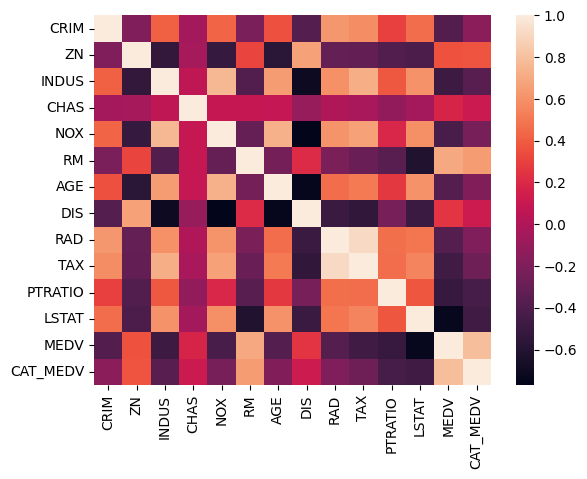

In [37]:
sns.heatmap(corr)
#THE DARKER THE COLOR, THE HIGHER THE CORRELATION
#sns.heatmap(corr, annot=True)
#sns.heatmap(corr, annot=True, fmt='.1f')
#sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdYlGn')
#sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu')

<Axes: >

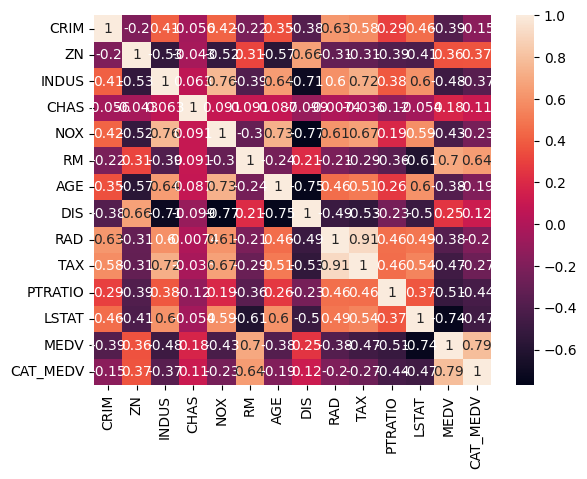

In [38]:
#sns.heatmap(corr)
sns.heatmap(corr, annot=True) #with numbers
#sns.heatmap(corr, annot=True, fmt='.1f')
#sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdYlGn')
#sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu')

<Axes: >

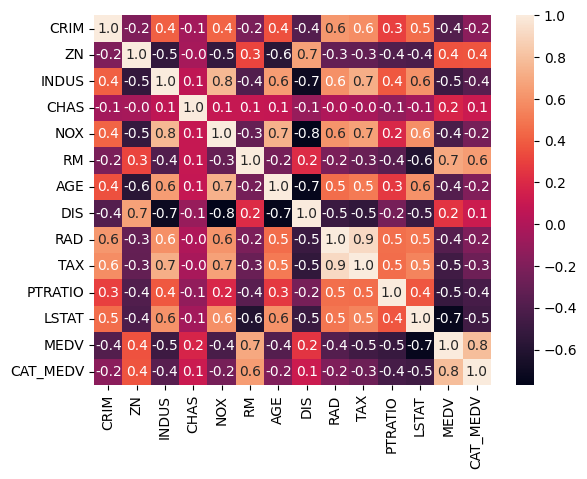

In [39]:
sns.heatmap(corr, annot=True, fmt='.1f')
#.1 1 decimal place

<Axes: >

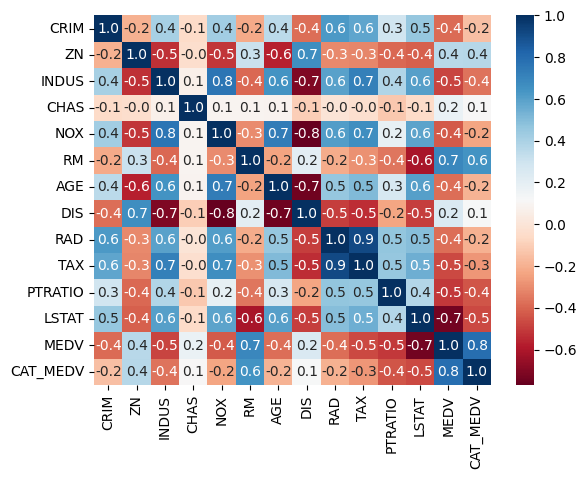

In [40]:
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu')
#change the color scheme; just google seaborn for the diff colors
#boston housing data  dictionary

<Axes: >

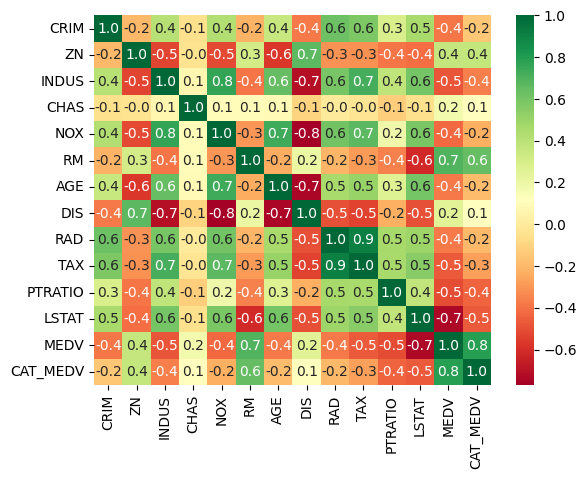

In [41]:
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdYlGn')
#another color scheme

In [ ]:
#what we are doing are unsupervised because there is no target variable; we are just doing data visualization

<Axes: >

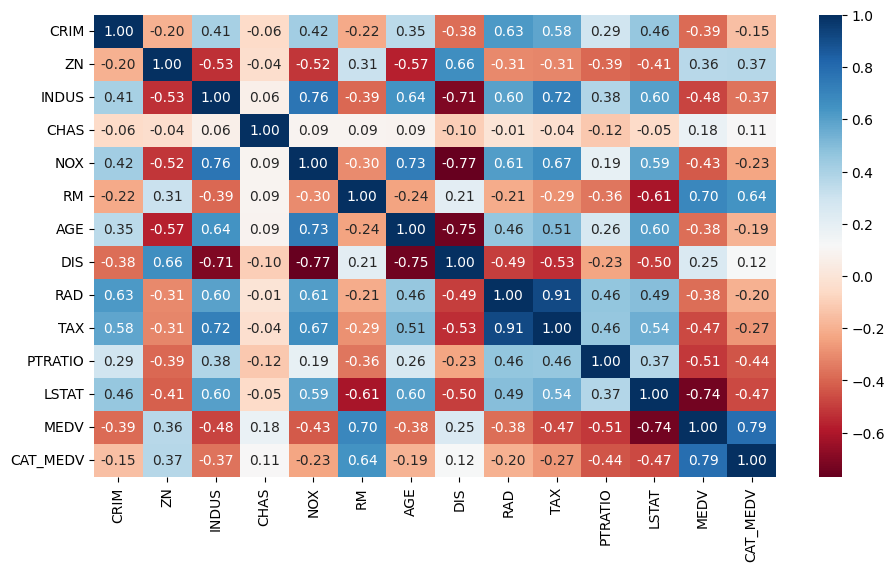

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(11,6)
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')
#this is a bit bigger than the previous, using matplotlib

## Adding Dimesions to plots


Create Scatter plot by NOX and LStat
Color the points by the value of CAT.MEDV

<Axes: xlabel='LSTAT', ylabel='NOX'>

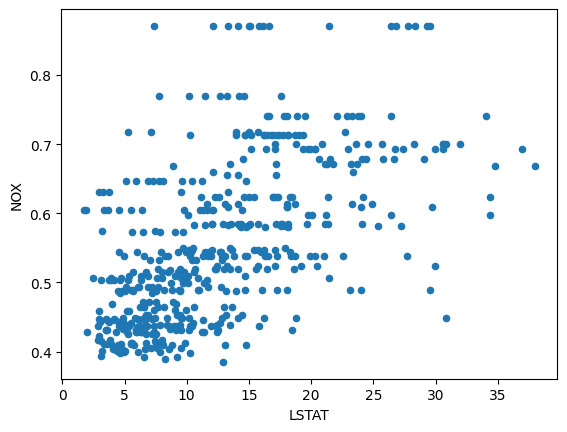

In [43]:
housing.plot.scatter('LSTAT','NOX')
#socio economic status by pollution; (lower income homes have higher pollution)
#based on the heatmap corr above

<Axes: xlabel='LSTAT', ylabel='NOX'>

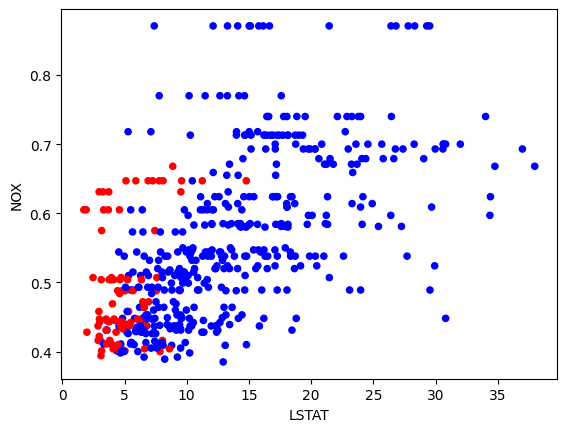

In [44]:
housing.plot.scatter('LSTAT','NOX',
                     c=['red' if c==1 else 'blue' for c in housing.CAT_MEDV])
#housing.plot.scatter('LSTAT','NOX',
#                     edgecolor=['red' if c==1 else 'blue' for c in housing.CAT_MEDV],
#                     color='none')
# c is color; red expensive homes

<Axes: xlabel='LSTAT', ylabel='NOX'>

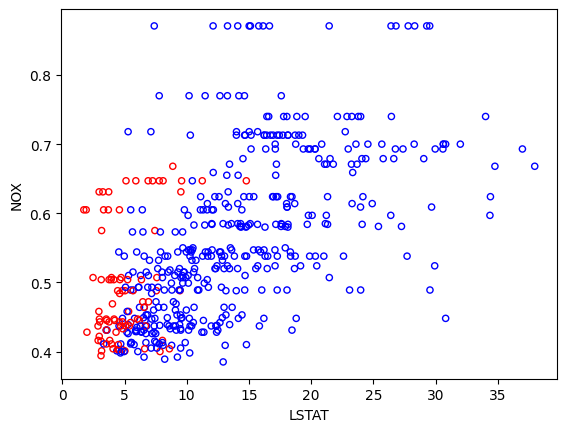

In [45]:
housing.plot.scatter('LSTAT','NOX',
                    edgecolor=['red' if c==1 else 'blue' for c in housing.CAT_MEDV],
                     color='none')
#edgecolor replaces c; not a solid circle; just the outline

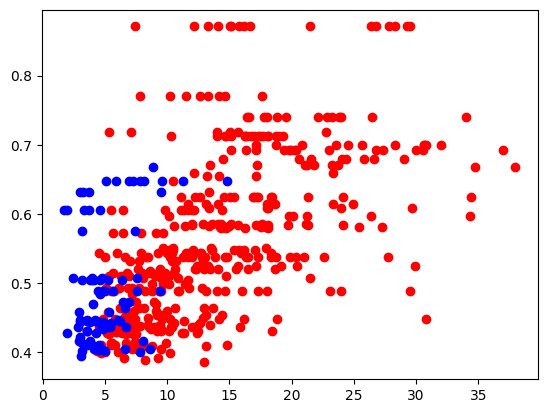

In [46]:
#matplotlib
fig, ax=plt.subplots()
for catValue, color in (0,'red'), (1,'Blue') :
  subset_df = housing[housing.CAT_MEDV == catValue]
  ax.scatter(subset_df.LSTAT, subset_df.NOX, color=color)
#you can do pandas first and then matplotlib

## Scatter Plot Matrix
Scatterplot matrix

In [47]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


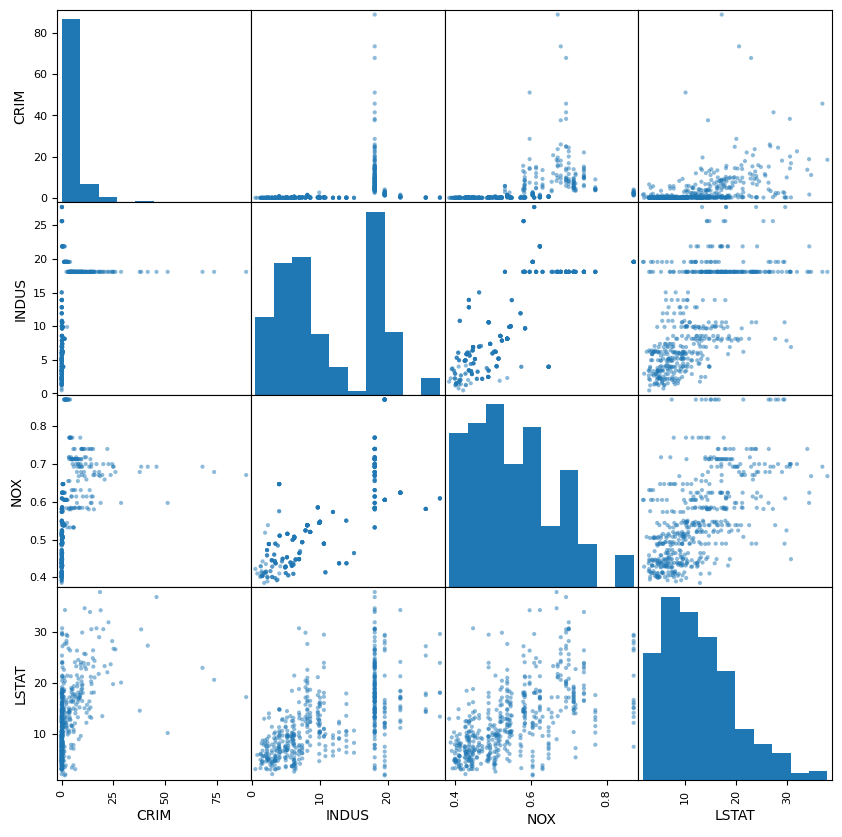

In [48]:
s = scatter_matrix(housing[['CRIM','INDUS','NOX','LSTAT']],
                   figsize=[10,10])
#all scatter plots; we can change it 5x5

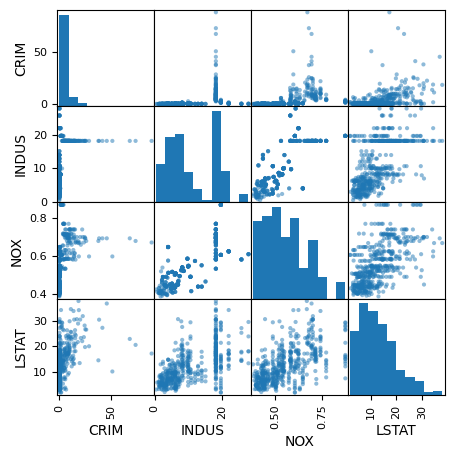

In [49]:
s = scatter_matrix(housing[['CRIM','INDUS','NOX','LSTAT']],
                   figsize=[5,5 ])
#perfect corr 1 are all histograms

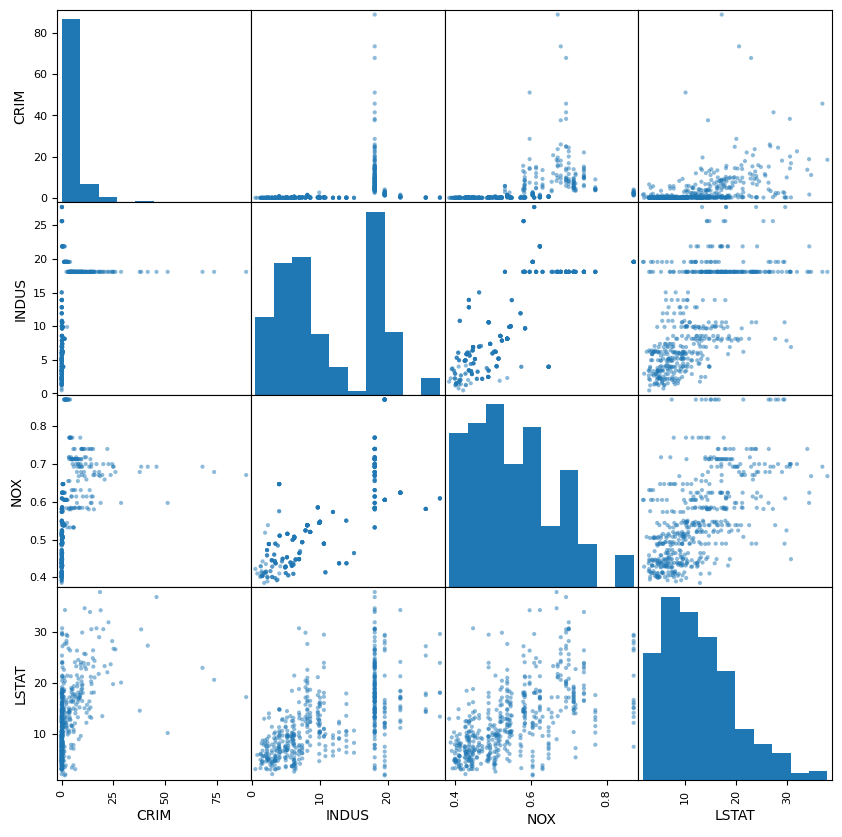

In [50]:
s = scatter_matrix(housing[['CRIM','INDUS','NOX','LSTAT']],
                   figsize=[10,10])
#option to place the corr coef also... CHECK THIS

## Log Plotting (uncrowd the data)

Create scatter plot of Med value and CRIM using Boston Housing data

<Axes: xlabel='CRIM', ylabel='MEDV'>

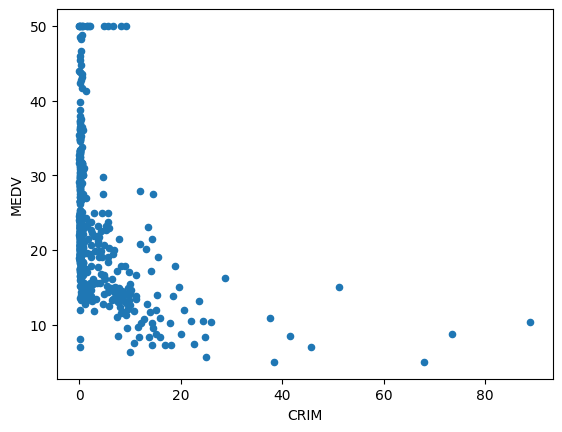

In [51]:
housing.plot.scatter('CRIM','MEDV')
#we can take the log

<Axes: xlabel='CRIM', ylabel='MEDV'>

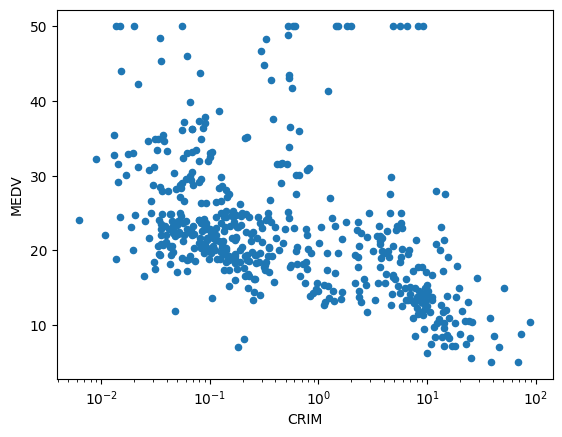

In [52]:
housing.plot.scatter('CRIM','MEDV', logx=True)
#just by changing the dist, we can see the negative corr bet MEDV and CRIM; we log the x axis since we have the bunching in the x

## Amtrak Ridership Curve Plots

Text(0, 0.5, 'Ridership (in thousands)')

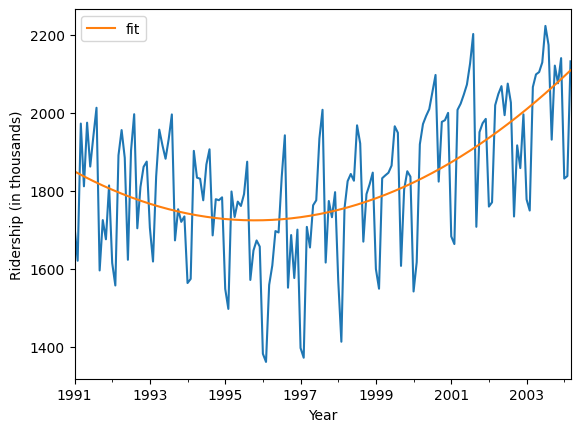

In [53]:
fig, axes = plt.subplots()

#fit a curve
quadraticFit = np.poly1d(np.polyfit(range(len(amtrak)), amtrak.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit':[quadraticFit(t) for t in range(len(amtrak_ts))]})
Amtrak_fit.index = amtrak_ts.index
Amtrak_fit.head()

ax = amtrak_ts.plot()
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Ridership (in thousands)')
#polynomial fit - we want to fit a line; a bend in the line

## Scatter plot with label (Utilities)

In [54]:
utilities = pd.read_csv('Utilities.csv')
utilities.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


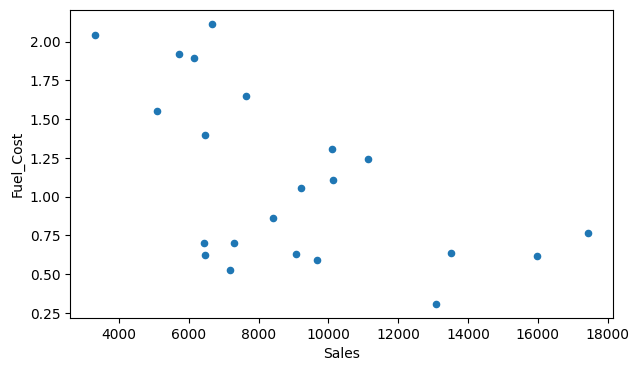

In [55]:
ax=utilities.plot.scatter('Sales','Fuel_Cost', figsize=[7,4])
#these dots; we might have some labels
#p = points.apply(lambda x: ax.text(*x), axis=1)
#p = points.apply(lambda x: ax.text(*x, rotation=30), axis=1)

0        Text(9077, 0.628, 'Arizona ')
1         Text(5088, 1.555, 'Boston ')
2        Text(9212, 1.058, 'Central ')
3      Text(6423, 0.7, 'Commonwealth')
4              Text(3300, 2.044, 'NY')
5       Text(11127, 1.241, 'Florida ')
6       Text(7642, 1.652, 'Hawaiian ')
7          Text(13082, 0.309, 'Idaho')
8        Text(8406, 0.862, 'Kentucky')
9        Text(6455, 0.623, 'Madison ')
10        Text(17441, 0.768, 'Nevada')
11    Text(6154, 1.897, 'New England')
12       Text(7179, 0.527, 'Northern')
13       Text(9673, 0.588, 'Oklahoma')
14         Text(6468, 1.4, 'Pacific ')
15          Text(15991, 0.62, 'Puget')
16       Text(5714, 1.92, 'San Diego')
17      Text(10140, 1.108, 'Southern')
18         Text(13507, 0.636, 'Texas')
19      Text(7287, 0.702, 'Wisconsin')
20         Text(6650, 2.116, 'United')
21      Text(10093, 1.306, 'Virginia')
dtype: object

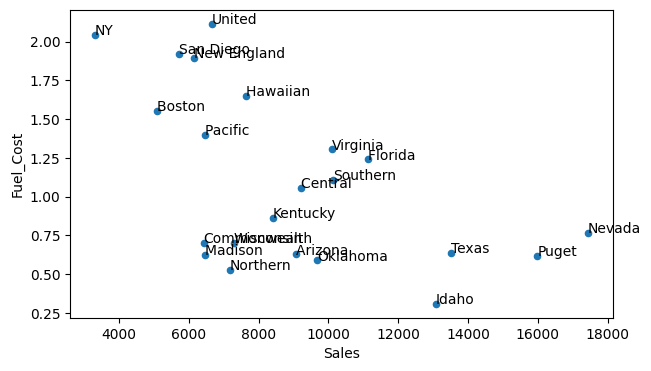

In [56]:
ax=utilities.plot.scatter('Sales','Fuel_Cost', figsize=[7,4])
points=utilities[['Sales','Fuel_Cost','Company']]
points.apply(lambda x: ax.text(*x), axis=1)

#we have sales and fuel cost


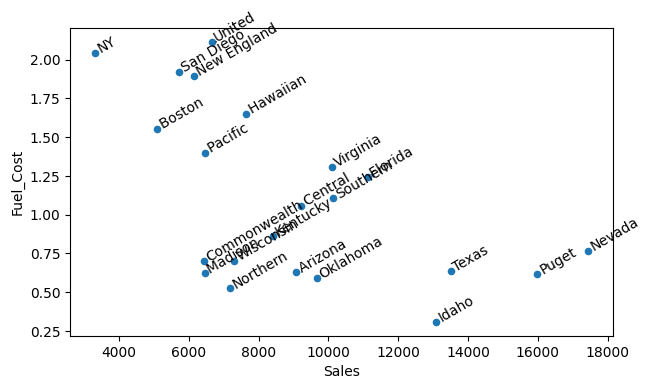

In [57]:
ax=utilities.plot.scatter('Sales','Fuel_Cost', figsize=[7,4])
points=utilities[['Sales','Fuel_Cost','Company']]
p = points.apply(lambda x: ax.text(*x, rotation=30), axis=1)